1. **Data Preprocessing**:
    - Load the dataset.
    - Check for missing values.
    - Check for duplicates.
    - Correct inconsistencies in intent labels.
    - Analyze the distribution of the data.  


2. **Data Splitting**:
    - Split the dataset into training, validation, and test sets in the proportion 60-20-20.  


3. **Feature Engineering**:
    - Vectorize the text data for use with machine learning models.  


4. **Model Training & Evaluation**:
    - Build the KNN and Multinomial NB models on the training set.
    - Evaluate the models on the validation set using accuracy, precision, recall, and F1-score.  


5. **Final Model Training & Evaluation**:
    - After identifying the best model using the validation set, combine the training and validation sets.
    - Train the best model on this combined data.
    - Evaluate the final model on the test set using the mentioned metrics.  


6. **Model Export & Voice ChatBot Integration**:
    - Save the best model to a file for later use.
    - Test it with the Speech Recognition Module.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import speech_recognition as sr

# 1. Data Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv("E:/Software/Data Science and AI/NLP/Edliyye/datasets/az_intent_balanced.csv")

# Check the first few rows of the data to get an understanding of its structure
print(data.head())

                                            Text  \
0                salam doğum kağızını bura verir   
1  sənəd hazır olanda süd pulu arayışı veriləcək   
2         salam xanım yaş kağızı almağa gəlmişəm   
3  salam doğum şəhadətnaməsi almaq üçün gəlmişəm   
4         təzə doğulan uşağa sənəd üçün gəlmişəm   

                                     Intent  
0  yeni doğulmuş uşağın qeydiyyata alınması  
1  yeni doğulmuş uşağın qeydiyyata alınması  
2  yeni doğulmuş uşağın qeydiyyata alınması  
3  yeni doğulmuş uşağın qeydiyyata alınması  
4  yeni doğulmuş uşağın qeydiyyata alınması  


**The dataset contains 2 columns:**

- ***Text***: This represents the user's input or query.
- ***Intent***: This is the category or intent of the corresponding user input.

In [3]:
print(data["Intent"].value_counts())

yeni doğulmuş uşağın qeydiyyata alınması       53
   ölümün qeydə alınması                       52
ailə tərkibi haqqında arayış                   38
   yeni doğulmuş uşağın qeydiyyata alınması    37
   ailə vəziyyətinə dair arayış                21
   ailə tərkibi haqqında arayış                20
ölümün qeydə alınması                          18
ailə vəziyyətinə dair arayış                    4
ölümün qeydə alınması                           1
  ailə vəziyyətinə dair arayış                  1
Name: Intent, dtype: int64


***There are some inconsistencies in the intent labels, with extra leading spaces in some labels. This has resulted in similar intents being counted separately, that is why first correct these inconsistencies and then proceed with the analysis of the distribution.***

Also, I'll:
- Check for missing values.
- Check for duplicates.

In [4]:
# Correct inconsistencies in intent labels by stripping leading and trailing spaces
data['Intent'] = data['Intent'].str.strip()

# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicates
duplicates = data.duplicated().sum()

# Display missing values and duplicates count
missing_values, duplicates

(Text      0
 Intent    0
 dtype: int64, 12)

The dataset has:

- No missing values.
- 12 duplicated rows.

I'll proceed by removing these duplicates. After that, I'll analyze the distribution of the data.

In [5]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Check the distribution of the intents
intent_distribution = data['Intent'].value_counts()
intent_distribution

yeni doğulmuş uşağın qeydiyyata alınması    86
ölümün qeydə alınması                       65
ailə tərkibi haqqında arayış                56
ailə vəziyyətinə dair arayış                26
Name: Intent, dtype: int64

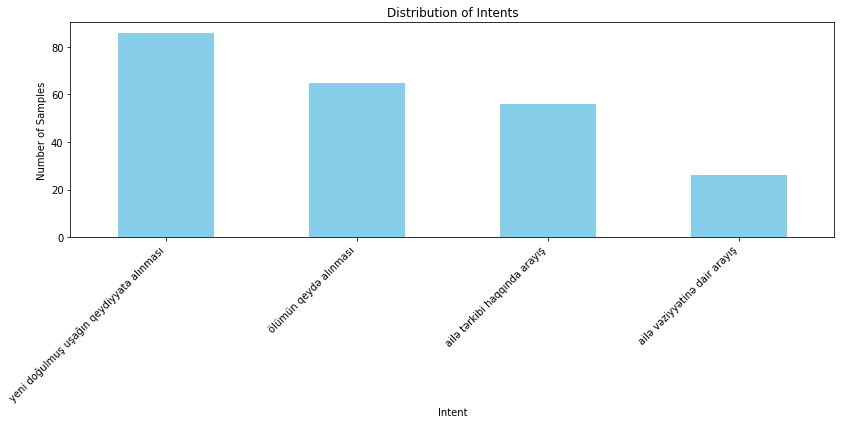

In [6]:
# Count of each intent
intent_counts = data['Intent'].value_counts()

# Plotting the distribution of intents
plt.figure(figsize=(12, 6))
intent_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Intents')
plt.ylabel('Number of Samples')
plt.xlabel('Intent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Data Splitting

In [7]:
# Splitting the data into training (60%), validation (20%), and test (20%) sets
train, temp = train_test_split(data, test_size=0.4, stratify=data['Intent'], random_state=42)
valid, test = train_test_split(temp, test_size=0.5, stratify=temp['Intent'], random_state=42)

# Display the shape of each set
train.shape, valid.shape, test.shape

((139, 2), (47, 2), (47, 2))

The dataset has been successfully split into training, validation, and test sets with the respective sizes:

- Training set: 139 samples
- Validation set: 47 samples
- Test set: 47 samples

Next, we need vectorize the text data to make it suitable for machine learning models. I'll use the TF-IDF (Term Frequency-Inverse Document Frequency) method for this.

# 3. Feature Engineering

In [8]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training set and transform the training data
X_train = vectorizer.fit_transform(train['Text'])

# Transform the validation and test data
X_valid = vectorizer.transform(valid['Text'])
X_test = vectorizer.transform(test['Text'])

# Extracting the labels for training, validation, and test sets
y_train = train['Intent']
y_valid = valid['Intent']
y_test = test['Intent']

X_train.shape, X_valid.shape, X_test.shape

((139, 299), (47, 299), (47, 299))

In [9]:
# Convert the TF-IDF matrix to a readable DataFrame for display
df_tfidf = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf

,05,2020,2023,29,500,agentliyinə,aid,ailə,ala,alacam,...,üzvlərinə,üzvüləri,üçün,şəhadətnamə,şəhadətnamələrimiz,şəhadətnaməni,şəhadətnaməsi,şəhadətnaməsini,əlaqədar,əlaqədər
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.238239,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.284935,0.0,0.0,0.0,0.0,0.0,0.0
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.413948,0.0,0.0,0.0,0.0,0.0,0.0
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.361817,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


***The data has been vectorized and transformed into a feature space with 299 features.***

Next, we will:

- Build and evaluate the K-Nearest Neighbors (KNN) and Multinomial Naive Bayes (NB) models using the validation set.
- Use accuracy, precision, recall, and F1-score as evaluation metrics.

# 4. Model Training & Evaluation

In [9]:
# Initialize the models
knn = KNeighborsClassifier()
mnb = MultinomialNB()

# Train the models
knn.fit(X_train, y_train)
mnb.fit(X_train, y_train)

# Predict on the validation set
knn_preds = knn.predict(X_valid)
mnb_preds = mnb.predict(X_valid)

# Evaluate the models
metrics = {
    'Accuracy': (accuracy_score(y_valid, knn_preds), accuracy_score(y_valid, mnb_preds)),
    'Precision': (precision_score(y_valid, knn_preds, average='weighted'), precision_score(y_valid, mnb_preds, average='weighted')),
    'Recall': (recall_score(y_valid, knn_preds, average='weighted'), recall_score(y_valid, mnb_preds, average='weighted')),
    'F1-Score': (f1_score(y_valid, knn_preds, average='weighted'), f1_score(y_valid, mnb_preds, average='weighted'))
}

metrics_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=['KNN', 'Multinomial NB'])
metrics_df

,Accuracy,Precision,Recall,F1-Score
KNN,0.851064,0.857463,0.851064,0.848364
Multinomial NB,0.851064,0.863222,0.851064,0.826332


Both models have similar accuracy and recall. ***However, KNN has a slightly higher F1-score (85%) compared to Multinomial NB (83%).***

**Given these results, we'll choose the KNN model as the best-performing model on the validation set.**

*Next, I'll combine the training and validation sets, train the KNN model on this combined data, and then evaluate it on the test set.*

# 5. Final Model Training & Evaluation

In [10]:
# Combine the training and validation sets
X_train_combined = vectorizer.transform(pd.concat([train['Text'], valid['Text']]))
y_train_combined = pd.concat([y_train, y_valid])

# Train the KNN model on the combined data
knn.fit(X_train_combined, y_train_combined)

# Predict on the test set
knn_test_preds = knn.predict(X_test)

# Evaluate the model on the test set
test_metrics = {
    'Accuracy': accuracy_score(y_test, knn_test_preds),
    'Precision': precision_score(y_test, knn_test_preds, average='weighted'),
    'Recall': recall_score(y_test, knn_test_preds, average='weighted'),
    'F1-Score': f1_score(y_test, knn_test_preds, average='weighted')
}

test_metrics

{'Accuracy': 0.851063829787234,
 'Precision': 0.8562465902891435,
 'Recall': 0.851063829787234,
 'F1-Score': 0.8476899696048632}

***F1-Score: 85%!***

*The model provides a reasonably good performance on unseen data.*

Finally, I will save the trained KNN model and the vectorizer to files so that we can use them in our voice chatbot.

# 6. Model Export & Voice/Text ChatBot Integration

In [13]:
# Save the KNN model
# knn_model_path = ".../knn_entez_model.pkl"
# joblib.dump(knn, knn_model_path)

# Save the vectorizer
# vectorizer_path = ".../tfidf_vectorizer.pkl"
# joblib.dump(vectorizer, vectorizer_path)

In [12]:
# Load the trained model and vectorizer
knn_model = joblib.load('knn_entez_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Initialize recognizer
recognizer = sr.Recognizer()

# Capture audio from the microphone
with sr.Microphone() as source:
    print("Say something in Azerbaijani!")
    audio = recognizer.listen(source)

# Convert audio to text
try:
    text = recognizer.recognize_google(audio, language="az-AZ")
    print()
    print(f"Recognized text: {text}")
    print()
    
    # Convert text to features and predict intent
    features = vectorizer.transform([text])
    intent = knn_model.predict(features)[0]
    
    print(f"Recognized Intent: {intent}")

except sr.UnknownValueError:
    print("Could not understand the audio!")

except sr.RequestError:
    print("API unavailable! Please try again later.")

Say something in Azerbaijani!
result2:
{   'alternative': [   {   'confidence': 0.58886725,
                           'transcript': 'subaylıq arayışı'},
                       {'transcript': 'subaylıq arayış'},
                       {'transcript': 'subaylıq arayışda'},
                       {'transcript': 'subaylıq arayışdır'},
                       {'transcript': 'subaylıq sarayı'}],
    'final': True}
Recognized text: subaylıq arayışı
Recognized Intent: ailə vəziyyətinə dair arayış


**The result showcases a complete flow from speech recognition to intent prediction:**

1. Speech Recognition:
   - The audio was captured and converted to text using Google's speech recognition service for the Azerbaijani language.
   - The recognized text was: "subaylıq arayışı".


2. Intent Prediction:
   - The recognized text was then transformed using the TF-IDF vectorizer to convert it into a feature vector.
   - The trained KNN model was then used to predict the intent of the recognized text.
   - The predicted intent was: "ailə vəziyyətinə dair arayış".

***Conclusions:***

- The system effectively recognized the spoken Azerbaijani phrase and predicted its corresponding intent.
- The recognized text "subaylıq arayışı" was mapped to the intent "ailə vəziyyətinə dair arayış" (Inquiry about family status). This shows the capability of the model to classify user inputs based on their intent, which is essential for a voice assistant to provide appropriate responses or actions.
- It's important to note that while the speech recognition provided alternative transcripts, it selected the one with the highest confidence.
- Overall, the integration of speech recognition with intent prediction provides a seamless interaction for users, allowing them to communicate naturally with the system and get relevant responses.

**This setup can be used effectively in the En Tez voice chatbot.**

In [17]:
# Function to predict the intent of a given text using the trained KNN model and vectorizer
def predict_intent(text):
    # Load the trained model and vectorizer
    knn_model = joblib.load('knn_entez_model.pkl')
    vectorizer = joblib.load('tfidf_vectorizer.pkl')
    
    # Transform the text using the trained vectorizer
    transformed_text = vectorizer.transform([text])
    
    # Predict the intent using the trained KNN model
    predicted_intent = knn_model.predict(transformed_text)
    
    return predicted_intent[0]

# Get text input from the user
user_input = input("Please enter the text you want to predict the intent for: ")

# Predict and display the intent
print()
print(f"Predicted Intent: {predict_intent(user_input)}")

Please enter the text you want to predict the intent for: vəfat edib

Predicted Intent: ölümün qeydə alınması
